In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geopandas import GeoSeries, GeoDataFrame, read_file
from shapely.geometry import Point
from pandas import Series, DataFrame, read_excel, merge
import pydeck as pdk

In [2]:
df_map = read_file('../assets/korea_map_shape.json', encoding='euc-kr')

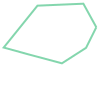

In [3]:
df_map['geometry'][0].boundary

In [13]:
df_map['geometry']

0       POLYGON ((126.97556 37.58968, 126.97359 37.593...
1       POLYGON ((126.97031 37.58418, 126.96504 37.585...
2       POLYGON ((126.97400 37.58654, 126.97031 37.584...
3       POLYGON ((126.97356 37.58323, 126.97034 37.583...
4       POLYGON ((126.97353 37.58182, 126.97080 37.581...
                              ...                        
5049    MULTIPOLYGON (((126.16879 33.28252, 126.16974 ...
5050    POLYGON ((126.54068 33.36718, 126.54445 33.364...
5051    POLYGON ((126.89033 33.48036, 126.88959 33.480...
5052    POLYGON ((126.29370 33.21800, 126.29442 33.220...
5053    POLYGON ((126.77600 33.30706, 126.78146 33.307...
Name: geometry, Length: 5054, dtype: geometry

In [4]:
df_map.head(5)

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97359 37.593..."
1,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.96504 37.585..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97031 37.584..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97034 37.583..."
4,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97080 37.581..."


In [5]:
MAPBOX_API_KEY = ""

In [6]:
def multipolygon_to_coordinates(x):
    lon, lat = x[0].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]

df_map = DataFrame(df_map)
df_map.head(2)

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97359 37.593..."
1,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.96504 37.585..."


In [7]:
df_a = read_excel("../assets/2022년 8월 전국 지역별 연령 통계.xlsx", engine="openpyxl")
df_a.head(5)

,행정기관코드,행정기관,총 거주자수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,1100000000,서울특별시,9385251,557760,749652,1404108,1418548,1446673,1479516,1271680,705043,309942,41155,1174
1,1111000000,서울특별시 종로구,140419,6582,10109,22536,19196,19965,23895,19715,11245,6262,884,30
2,1111051500,서울특별시 종로구 청운효자동,11559,692,1114,1472,1531,2028,1848,1364,907,533,68,2
3,1111053000,서울특별시 종로구 사직동,9001,524,653,1123,1446,1389,1467,1152,688,478,80,1
4,1111054000,서울특별시 종로구 삼청동,2316,91,163,286,296,336,354,385,228,149,26,2


In [8]:
df_a["행정기관코드"] = df_a["행정기관코드"].apply(lambda x: str(x)[0:7 + 1])
df_a.rename(columns = {'행정기관코드' : 'EMD_CD'}, inplace = True)
df_a.rename(columns = {'20~29세' : '20s'}, inplace = True)
df_a.rename(columns = {'30~39세' : '30s'}, inplace = True)
df_a.rename(columns = {'40~49세' : '40s'}, inplace = True)
df_a.rename(columns = {'50~59세' : '50s'}, inplace = True)
df_a.rename(columns = {'60~69세' : '60s'}, inplace = True)
df_a.rename(columns = {'70~79세' : '70s'}, inplace = True)
df_a.rename(columns = {'80~89세' : '80s'}, inplace = True)
df_a.rename(columns = {'90~99세' : '90s'}, inplace = True)
df_a.rename(columns = {'100세 이상' : '100s'}, inplace = True)
df_a.head(5)

,EMD_CD,행정기관,총 거주자수,0~9세,10~19세,20s,30s,40s,50s,60s,70s,80s,90s,100s
0,11000000,서울특별시,9385251,557760,749652,1404108,1418548,1446673,1479516,1271680,705043,309942,41155,1174
1,11110000,서울특별시 종로구,140419,6582,10109,22536,19196,19965,23895,19715,11245,6262,884,30
2,11110515,서울특별시 종로구 청운효자동,11559,692,1114,1472,1531,2028,1848,1364,907,533,68,2
3,11110530,서울특별시 종로구 사직동,9001,524,653,1123,1446,1389,1467,1152,688,478,80,1
4,11110540,서울특별시 종로구 삼청동,2316,91,163,286,296,336,354,385,228,149,26,2


In [9]:
df = merge(df_map, df_a, left_on='EMD_CD', right_on='EMD_CD', how='outer')
df = df[df['행정기관'].notna()]
df.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry,행정기관,총 거주자수,0~9세,10~19세,20s,30s,40s,50s,60s,70s,80s,90s,100s
654,26710250,Gijang-eup,기장읍,"POLYGON ((129.25123 35.24432, 129.24840 35.250...",부산광역시 강서구 가락동,2282.0,38.0,62.0,153.0,182.0,177.0,419.0,606.0,410.0,206.0,28.0,1.0
655,26710253,Jangan-eup,장안읍,"POLYGON ((129.28816 35.32116, 129.28871 35.319...",부산광역시 금정구 선두구동,2250.0,60.0,85.0,191.0,187.0,206.0,438.0,565.0,322.0,172.0,23.0,1.0
656,26710256,Jeonggwan-eup,정관읍,"POLYGON ((129.22969 35.31945, 129.23162 35.321...",부산광역시 금정구 금성동,1005.0,49.0,118.0,70.0,65.0,153.0,151.0,220.0,118.0,53.0,8.0,0.0
658,26710330,Cheolma-myeon,철마면,"POLYGON ((129.17992 35.30482, 129.17526 35.304...",부산광역시 중구 남포동,867.0,10.0,22.0,48.0,61.0,90.0,182.0,264.0,135.0,49.0,6.0,0.0
854,27710250,Hwawon-eup,화원읍,"POLYGON ((128.50607 35.81454, 128.50035 35.817...",대구광역시 달성군 화원읍,45893.0,2727.0,4071.0,5762.0,4747.0,6379.0,9292.0,7711.0,3529.0,1496.0,177.0,2.0


In [21]:
layer = pdk.Layer(
    "PolygonLayer",
    df,
    get_path="geometry",
    get_polygon='geometry',
    get_fill_color='[0, 255, 0]',
    pickable=True,
    auto_highlight=True,
    extruded = True,
    get_elevation = 'number',
    elevation_scale = 0.2
)

center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=7
)

r = pdk.Deck(
    layers=[layer],
    map_style="mapbox://styles/mapbox/outdoors-v11",
    mapbox_key=MAPBOX_API_KEY,
    initial_view_state=view_state
)
r.to_html('demo.html')